In [1]:
### Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import timeit
import datetime
import calendar
import matplotlib.dates as dates
import matplotlib.ticker as ticker
from matplotlib import gridspec


In [2]:
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
#rc('font',**{'family':'serif','serif':['Times']})

In [3]:
### Data Import
dat = pd.read_csv("wuhan-air-quality-cleansed-20200910.csv")
dat["date"] = pd.to_datetime(dict(year=2020, month=dat.Month, day=dat.Day))
dat = dat[dat.date != "2020-02-29"]


dat["pm25_diff"] = dat.avg3y_avg5d_pm25 - dat.avg5d_2020_pm25
dat["pm25_cumdiff"] = dat["pm25_diff"].cumsum(skipna = False)

dat["pm10_diff"] = dat.avg3y_avg5d_pm10 - dat.avg5d_2020_pm10
dat["pm10_cumdiff"] = dat["pm10_diff"].cumsum(skipna = False)

dat["no2_diff"] = dat.avg3y_avg5d_no2 - dat.avg5d_2020_no2
dat["no2_cumdiff"] = dat["no2_diff"].cumsum(skipna = False)

dat["co_diff"] = dat.avg3y_avg5d_co - dat.avg5d_2020_co
dat["co_cumdiff"] = dat["no2_diff"].cumsum(skipna = False)

dat["o3_diff"] = dat.avg3y_avg5d_o3 - dat.avg5d_2020_o3
dat["o3_cumdiff"] = dat["o3_diff"].cumsum(skipna = False)

dat["so2_diff"] = dat.avg3y_avg5d_so2 - dat.avg5d_2020_so2
dat["so2_cumdiff"] = dat["so2_diff"].cumsum(skipna = False)


dat.columns

Index(['Month', 'Day', 'avg5y_pm25', 'avg5y_pm10', 'avg5y_o3', 'avg5y_no2',
       'avg5y_so2', 'avg5y_co', 'avg3y_pm25', 'avg3y_pm10', 'avg3y_o3',
       'avg3y_no2', 'avg3y_so2', 'avg3y_co', '2020_pm25', '2020_pm10',
       '2020_o3', '2020_no2', '2020_so2', '2020_co', 'avg5d_2017_pm25',
       'avg5d_2017_pm10', 'avg5d_2017_o3', 'avg5d_2017_no2', 'avg5d_2017_so2',
       'avg5d_2017_co', 'avg5d_2018_pm25', 'avg5d_2018_pm10', 'avg5d_2018_o3',
       'avg5d_2018_no2', 'avg5d_2018_so2', 'avg5d_2018_co', 'avg5d_2019_pm25',
       'avg5d_2019_pm10', 'avg5d_2019_o3', 'avg5d_2019_no2', 'avg5d_2019_so2',
       'avg5d_2019_co', 'avg5d_2020_pm25', 'avg5d_2020_pm10', 'avg5d_2020_o3',
       'avg5d_2020_no2', 'avg5d_2020_so2', 'avg5d_2020_co', 'avg3y_avg5d_pm25',
       'avg3y_avg5d_pm10', 'avg3y_avg5d_o3', 'avg3y_avg5d_no2',
       'avg3y_avg5d_so2', 'avg3y_avg5d_co', 'date', 'pm25_diff',
       'pm25_cumdiff', 'pm10_diff', 'pm10_cumdiff', 'no2_diff', 'no2_cumdiff',
       'co_diff', 'co_cumd

In [4]:
## Graph Plot

# X Axis spanning 2015 only:
date_index1 = np.arange('2020-01-01','2020-02-29', dtype='datetime64[D]')
date_index2 = np.arange('2020-03-01','2021-01-01', dtype='datetime64[D]')
date_index = np.append(date_index1, date_index2)
#len(date_index)
date_index

array(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
       '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
       '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
       '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
       '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20',
       '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
       '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
       '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01',
       '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05',
       '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09',
       '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
       '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17',
       '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21',
       '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25',
       '2020-02-26', '2020-02-27', '2020-02-28', '2020-03-01',
       '2020-03-02', '2020-03-03', '2020-03-04', '2020-

Text(0.5, 1.07, "PM2.5 'Debt' under COVID-19 lockdown in Hong Kong")

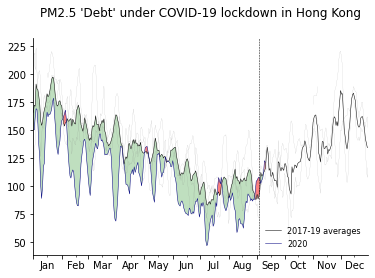

In [5]:
plt.figure()

#plt.plot(date_index, dat.avg5d_2018_pm25,color='black', linewidth=1) # Max in red.

y1 = dat.avg3y_avg5d_pm25
y2 = dat.avg5d_2020_pm25

plt.plot(date_index, y1, color='black', linewidth=0.5, label="line1") # Max in red.
plt.plot(date_index, y2, color='navy', linewidth=0.5, label="line2") # Max in red.


plt.plot(date_index, dat.avg5d_2017_pm25,color='grey', linewidth=0.1) # Max in red.
plt.plot(date_index, dat.avg5d_2018_pm25,color='grey', linewidth=0.1) # Max in red.
plt.plot(date_index, dat.avg5d_2019_pm25,color='grey', linewidth=0.1) # Max in red.


ax = plt.gca()
ax.set_xlim([datetime.date(2020, 1, 1), datetime.date(2020, 12, 31)])

ax.fill_between(date_index, y1, y2, 
                where=(y1 >= y2),facecolor='green', alpha=0.25)
ax.fill_between(date_index, y1, y2, 
                where=(y1 <= y2),facecolor='red', alpha=0.5)

# Where you locate the major and minor ticks:
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=16))

ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))

plt.axvline(x=datetime.date(2020,9,3), ymin=0, ymax=1, color="black", linewidth=0.5, linestyle="--")


plt.legend(('2017-19 averages', '2020'),frameon=False, loc=4, fontsize=8)


ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
#ax.spines["left"].set_visible(False)
#ax.spines["bottom"].set_visible(False)

plt.title("PM2.5 'Debt' under COVID-19 lockdown in Hong Kong", x=0.5,y=1.07,fontsize=12)
#plt.suptitle('XXXXXXXXXXXXXXXXX',x=0.5,y=0.93,fontsize=8)

#plt.savefig("High resoltion.png",dpi=300)

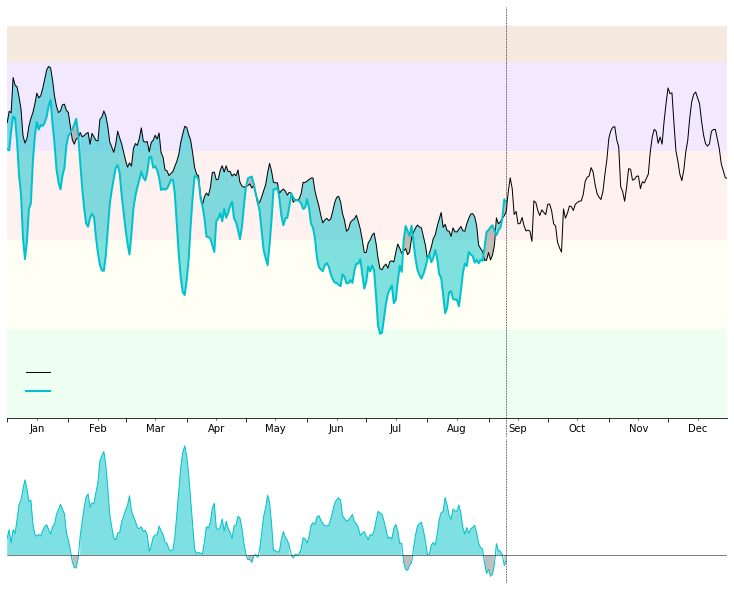

In [8]:
mfont = {'fontname':'Calibri'}

fig = plt.figure(constrained_layout=False)
spec = fig.add_gridspec(ncols=1, nrows=2, height_ratios=[3,1])
fig.set_size_inches([10,8],forward=True)

axs = [None] * 10
axs[0] = fig.add_subplot(spec[0])
axs[1] = fig.add_subplot(spec[1])

aqicn0 = np.zeros((len(dat),), dtype=int)            # Baseline
aqicn1 = np.zeros((len(dat),), dtype=int) + 50       # <50 Good Green
aqicn2 = np.zeros((len(dat),), dtype=int) + 100      # 50-<100 Moderate Yellow
aqicn3 = np.zeros((len(dat),), dtype=int) + 150      # 100-<150 Unhealthy for sensitive group Orange
aqicn4 = np.zeros((len(dat),), dtype=int) + 200      # 150-<200 Unhealthy Red
aqicn5 = np.zeros((len(dat),), dtype=int) + 300      # 200-<300 Very Unhealthy Purple
aqicn6 = np.zeros((len(dat),), dtype=int) + 500      # 300-<500 Hazardous Brown

## If want fill
axs[0].fill_between(date_index, aqicn0, aqicn1,facecolor='#BFFCC6', alpha=0.25)
axs[0].fill_between(date_index, aqicn1, aqicn2,facecolor='#FFFFD1', alpha=0.25)
axs[0].fill_between(date_index, aqicn2, aqicn3,facecolor='#FFCBC1', alpha=0.25)
axs[0].fill_between(date_index, aqicn3, aqicn4,facecolor='#CCAAFF', alpha=0.25)
axs[0].fill_between(date_index, aqicn4, aqicn5-80,facecolor='#DDA982', alpha=0.25)

# [0]
y1 = dat.avg3y_avg5d_pm25
y2 = dat.avg5d_2020_pm25

axs[0].plot(date_index, y1, color='black', linewidth=1, label="line1")
axs[0].plot(date_index, y2, color='#00c2cb', linewidth=2, label="line2")

axs[0].fill_between(date_index, y1, y2, 
                where=(y1 >= y2),facecolor='#00c2cb', alpha=0.5)
axs[0].fill_between(date_index, y1, y2, 
                where=(y1 <= y2),facecolor='grey', alpha=0.5)

#axs[0].set_title("PM2.5 Level", x=0.99,y=0.05, fontsize=14, loc="right", **mfont)
axs[0].yaxis.set_visible(False)
#axs[0].xaxis.set_visible(False) 
axs[0].spines["right"].set_visible(False)
axs[0].spines["top"].set_visible(False)
axs[0].spines["left"].set_visible(False)
axs[0].spines["bottom"].set_position(('data',0))
#axs[0].spines["bottom"].set_visible(False)
axs[0].axvline(x=datetime.date(2020,9,10), ymin=0, ymax=1, color="black", linewidth=0.5, linestyle="--")

axs[0].set_xlim([datetime.date(2020, 1, 1), datetime.date(2020, 12, 31)])
axs[0].xaxis.set_major_locator(dates.MonthLocator())
axs[0].xaxis.set_minor_locator(dates.MonthLocator(bymonthday=16))
axs[0].xaxis.set_major_formatter(ticker.NullFormatter())
axs[0].xaxis.set_minor_formatter(dates.DateFormatter('%b'))

#axs[0].legend(('2017-19 average', '2020'),frameon=False, loc=3, fontsize=12)
axs[0].legend(('', ''),frameon=False, loc=(0.02,0.08), fontsize=12)

#axs[0].text(0.9, 0.3, "Good", fontsize=12, transform=axs[0].transAxes)
#axs[0].text(s="Moderate", x=0.9, y=0.4)
#axs[0].text(s="Unhealthy for sensitive groups", x=0.9, y=0.9)


## If want line
#axs[0].plot(date_index, aqicn0+20, color="#006600", linewidth=2, linestyle="-")
#axs[0].plot(date_index, aqicn1, color="#cccc00", linewidth=2, linestyle="-")
#axs[0].plot(date_index, aqicn2, color="#ff9900", linewidth=2, linestyle="-")


# [1]
y1 = dat.pm25_diff
y2 = np.zeros((len(y1),), dtype=int)

axs[1].plot(date_index, y1, color='#00c2cb', linewidth=1, label="line1")
axs[1].plot(date_index, y2, color='black', linewidth=0.5, label="line2")

axs[1].fill_between(date_index, y1, y2, 
                where=(y1 >= y2),facecolor='#00c2cb', alpha=0.5)
axs[1].fill_between(date_index, y1, y2, 
                where=(y1 <= y2),facecolor='grey', alpha=0.5)

#axs[1].set_title("Net Reduction", x=0.99,y=0.3, fontsize=14, loc="right", **mfont)

axs[1].yaxis.set_visible(False)
axs[1].xaxis.set_visible(False) 
axs[1].spines["right"].set_visible(False)
axs[1].spines["top"].set_visible(False)
axs[1].spines["left"].set_visible(False)
axs[1].spines["bottom"].set_visible(False)
axs[1].axvline(x=datetime.date(2020,9,10), ymin=0, ymax=1, color="black", linewidth=0.5, linestyle="--")
axs[1].set_xlim([datetime.date(2020, 1, 1), datetime.date(2020, 12, 31)])

fig.tight_layout(pad=0, w_pad=2, h_pad=0)
#fig.suptitle("Hong Kong pollution 'debt' of 2020, as to previous 3-year average", fontsize=18,y=1.05, **mfont)
fig.savefig("20200910-PM25.png",dpi=300, bbox_inches='tight')

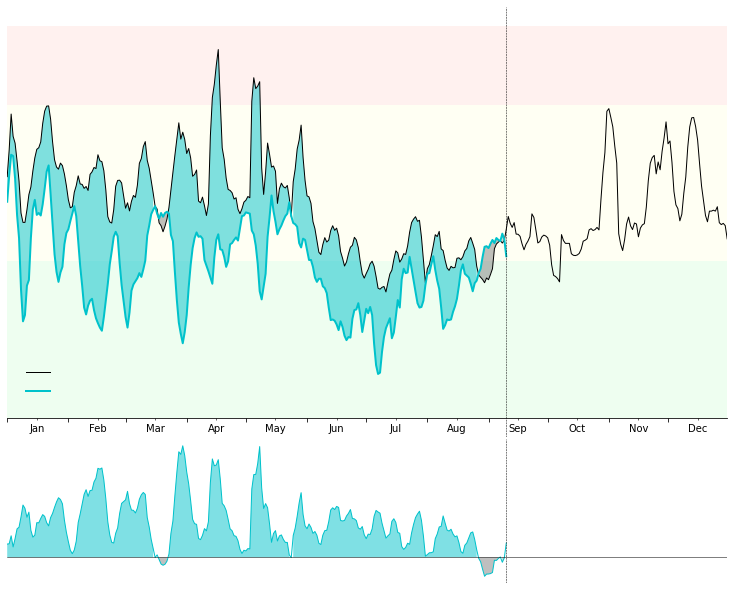

In [13]:
mfont = {'fontname':'Calibri'}

fig = plt.figure(constrained_layout=False)
spec = fig.add_gridspec(ncols=1, nrows=2, height_ratios=[3,1])
fig.set_size_inches([10,8],forward=True)

axs = [None] * 10
axs[0] = fig.add_subplot(spec[0])
axs[1] = fig.add_subplot(spec[1])

aqicn0 = np.zeros((len(dat),), dtype=int)            # Baseline
aqicn1 = np.zeros((len(dat),), dtype=int) + 50       # <50 Good Green
aqicn2 = np.zeros((len(dat),), dtype=int) + 100      # 50-<100 Moderate Yellow
aqicn3 = np.zeros((len(dat),), dtype=int) + 150      # 100-<150 Unhealthy for sensitive group Orange
aqicn4 = np.zeros((len(dat),), dtype=int) + 200      # 150-<200 Unhealthy Red
aqicn5 = np.zeros((len(dat),), dtype=int) + 300      # 200-<300 Very Unhealthy Purple
aqicn5 = np.zeros((len(dat),), dtype=int) + 500      # 300-<500 Hazardous Brown

## If want fill
axs[0].fill_between(date_index, aqicn0, aqicn1,facecolor='#BFFCC6', alpha=0.25)
axs[0].fill_between(date_index, aqicn1, aqicn2,facecolor='#FFFFD1', alpha=0.25)
axs[0].fill_between(date_index, aqicn2, aqicn3-25,facecolor='#FFCBC1', alpha=0.25)
#axs[0].fill_between(date_index, aqicn3, aqicn4,facecolor='#CCAAFF', alpha=0.25)
#axs[0].fill_between(date_index, aqicn4, aqicn5,facecolor='#DDA982', alpha=0.25)

# [0]
y1 = dat.avg3y_avg5d_pm10
y2 = dat.avg5d_2020_pm10

axs[0].plot(date_index, y1, color='black', linewidth=1, label="line1")
axs[0].plot(date_index, y2, color='#00c2cb', linewidth=2, label="line2")

axs[0].fill_between(date_index, y1, y2, 
                where=(y1 >= y2),facecolor='#00c2cb', alpha=0.5)
axs[0].fill_between(date_index, y1, y2, 
                where=(y1 <= y2),facecolor='grey', alpha=0.5)

#axs[0].set_title("PM2.5 Level", x=0.99,y=0.05, fontsize=14, loc="right", **mfont)
axs[0].yaxis.set_visible(False)
#axs[0].xaxis.set_visible(False) 
axs[0].spines["right"].set_visible(False)
axs[0].spines["top"].set_visible(False)
axs[0].spines["left"].set_visible(False)
axs[0].spines["bottom"].set_position(('data',0))
#axs[0].spines["bottom"].set_visible(False)
axs[0].axvline(x=datetime.date(2020,9,10), ymin=0, ymax=1, color="black", linewidth=0.5, linestyle="--")

axs[0].set_xlim([datetime.date(2020, 1, 1), datetime.date(2020, 12, 31)])
axs[0].xaxis.set_major_locator(dates.MonthLocator())
axs[0].xaxis.set_minor_locator(dates.MonthLocator(bymonthday=16))
axs[0].xaxis.set_major_formatter(ticker.NullFormatter())
axs[0].xaxis.set_minor_formatter(dates.DateFormatter('%b'))

#axs[0].legend(('2017-19 average', '2020'),frameon=False, loc=3, fontsize=12)
axs[0].legend(('', ''),frameon=False, loc=(0.02,0.08), fontsize=12)

#axs[0].text(0.9, 0.3, "Good", fontsize=12, transform=axs[0].transAxes)
#axs[0].text(s="Moderate", x=0.9, y=0.4)
#axs[0].text(s="Unhealthy for sensitive groups", x=0.9, y=0.9)


## If want line
#axs[0].plot(date_index, aqicn0+20, color="#006600", linewidth=2, linestyle="-")
#axs[0].plot(date_index, aqicn1, color="#cccc00", linewidth=2, linestyle="-")
#axs[0].plot(date_index, aqicn2, color="#ff9900", linewidth=2, linestyle="-")


# [1]
y1 = dat.pm10_diff
y2 = np.zeros((len(y1),), dtype=int)

axs[1].plot(date_index, y1, color='#00c2cb', linewidth=1, label="line1")
axs[1].plot(date_index, y2, color='black', linewidth=0.5, label="line2")

axs[1].fill_between(date_index, y1, y2, 
                where=(y1 >= y2),facecolor='#00c2cb', alpha=0.5)
axs[1].fill_between(date_index, y1, y2, 
                where=(y1 <= y2),facecolor='grey', alpha=0.5)

#axs[1].set_title("Net Reduction", x=0.99,y=0.3, fontsize=14, loc="right", **mfont)

axs[1].yaxis.set_visible(False)
axs[1].xaxis.set_visible(False) 
axs[1].spines["right"].set_visible(False)
axs[1].spines["top"].set_visible(False)
axs[1].spines["left"].set_visible(False)
axs[1].spines["bottom"].set_visible(False)
axs[1].axvline(x=datetime.date(2020,9,10), ymin=0, ymax=1, color="black", linewidth=0.5, linestyle="--")
axs[1].set_xlim([datetime.date(2020, 1, 1), datetime.date(2020, 12, 31)])

fig.tight_layout(pad=0, w_pad=2, h_pad=0)
#fig.suptitle("Hong Kong pollution 'debt' of 2020, as to previous 3-year average", fontsize=18,y=1.05, **mfont)
fig.savefig("20200910-PM10.png",dpi=300, bbox_inches='tight')

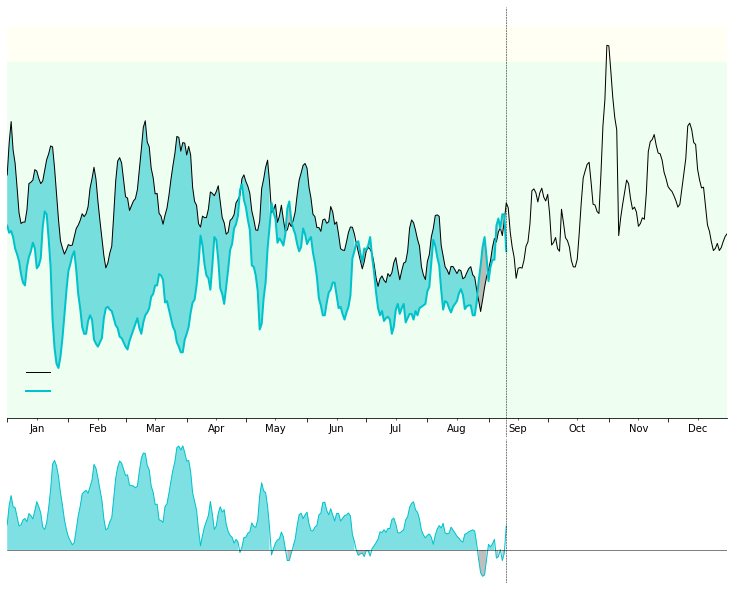

In [15]:
mfont = {'fontname':'Calibri'}

fig = plt.figure(constrained_layout=False)
spec = fig.add_gridspec(ncols=1, nrows=2, height_ratios=[3,1])
fig.set_size_inches([10,8],forward=True)

axs = [None] * 10
axs[0] = fig.add_subplot(spec[0])
axs[1] = fig.add_subplot(spec[1])

aqicn0 = np.zeros((len(dat),), dtype=int)            # Baseline
aqicn1 = np.zeros((len(dat),), dtype=int) + 50       # <50 Good Green
aqicn2 = np.zeros((len(dat),), dtype=int) + 100      # 50-<100 Moderate Yellow
aqicn3 = np.zeros((len(dat),), dtype=int) + 150      # 100-<150 Unhealthy for sensitive group Orange
aqicn4 = np.zeros((len(dat),), dtype=int) + 200      # 150-<200 Unhealthy Red
aqicn5 = np.zeros((len(dat),), dtype=int) + 300      # 200-<300 Very Unhealthy Purple
aqicn5 = np.zeros((len(dat),), dtype=int) + 500      # 300-<500 Hazardous Brown

## If want fill
axs[0].fill_between(date_index, aqicn0, aqicn1,facecolor='#BFFCC6', alpha=0.25)
axs[0].fill_between(date_index, aqicn1, aqicn2-45,facecolor='#FFFFD1', alpha=0.25)
#axs[0].fill_between(date_index, aqicn2, aqicn3-45,facecolor='#FFCBC1', alpha=0.25)
#axs[0].fill_between(date_index, aqicn3, aqicn4,facecolor='#CCAAFF', alpha=0.25)
#axs[0].fill_between(date_index, aqicn4, aqicn5,facecolor='#DDA982', alpha=0.25)

# [0]
y1 = dat.avg3y_avg5d_no2
y2 = dat.avg5d_2020_no2

axs[0].plot(date_index, y1, color='black', linewidth=1, label="line1")
axs[0].plot(date_index, y2, color='#00c2cb', linewidth=2, label="line2")

axs[0].fill_between(date_index, y1, y2, 
                where=(y1 >= y2),facecolor='#00c2cb', alpha=0.5)
axs[0].fill_between(date_index, y1, y2, 
                where=(y1 <= y2),facecolor='grey', alpha=0.5)

#axs[0].set_title("PM2.5 Level", x=0.99,y=0.05, fontsize=14, loc="right", **mfont)
axs[0].yaxis.set_visible(False)
#axs[0].xaxis.set_visible(False) 
axs[0].spines["right"].set_visible(False)
axs[0].spines["top"].set_visible(False)
axs[0].spines["left"].set_visible(False)
axs[0].spines["bottom"].set_position(('data',0))
#axs[0].spines["bottom"].set_visible(False)
axs[0].axvline(x=datetime.date(2020,9,10), ymin=0, ymax=1, color="black", linewidth=0.5, linestyle="--")

axs[0].set_xlim([datetime.date(2020, 1, 1), datetime.date(2020, 12, 31)])
axs[0].xaxis.set_major_locator(dates.MonthLocator())
axs[0].xaxis.set_minor_locator(dates.MonthLocator(bymonthday=16))
axs[0].xaxis.set_major_formatter(ticker.NullFormatter())
axs[0].xaxis.set_minor_formatter(dates.DateFormatter('%b'))

#axs[0].legend(('2017-19 average', '2020'),frameon=False, loc=3, fontsize=12)
axs[0].legend(('', ''),frameon=False, loc=(0.02,0.08), fontsize=12)

#axs[0].text(0.9, 0.3, "Good", fontsize=12, transform=axs[0].transAxes)
#axs[0].text(s="Moderate", x=0.9, y=0.4)
#axs[0].text(s="Unhealthy for sensitive groups", x=0.9, y=0.9)


## If want line
#axs[0].plot(date_index, aqicn0+20, color="#006600", linewidth=2, linestyle="-")
#axs[0].plot(date_index, aqicn1, color="#cccc00", linewidth=2, linestyle="-")
#axs[0].plot(date_index, aqicn2, color="#ff9900", linewidth=2, linestyle="-")


# [1]
y1 = dat.no2_diff
y2 = np.zeros((len(y1),), dtype=int)

axs[1].plot(date_index, y1, color='#00c2cb', linewidth=1, label="line1")
axs[1].plot(date_index, y2, color='black', linewidth=0.5, label="line2")

axs[1].fill_between(date_index, y1, y2, 
                where=(y1 >= y2),facecolor='#00c2cb', alpha=0.5)
axs[1].fill_between(date_index, y1, y2, 
                where=(y1 <= y2),facecolor='grey', alpha=0.5)

#axs[1].set_title("Net Reduction", x=0.99,y=0.3, fontsize=14, loc="right", **mfont)

axs[1].yaxis.set_visible(False)
axs[1].xaxis.set_visible(False) 
axs[1].spines["right"].set_visible(False)
axs[1].spines["top"].set_visible(False)
axs[1].spines["left"].set_visible(False)
axs[1].spines["bottom"].set_visible(False)
axs[1].axvline(x=datetime.date(2020,9,10), ymin=0, ymax=1, color="black", linewidth=0.5, linestyle="--")
axs[1].set_xlim([datetime.date(2020, 1, 1), datetime.date(2020, 12, 31)])

fig.tight_layout(pad=0, w_pad=2, h_pad=0)
#fig.suptitle("Hong Kong pollution 'debt' of 2020, as to previous 3-year average", fontsize=18,y=1.05, **mfont)
fig.savefig("20200910-NO2.png",dpi=300, bbox_inches='tight')

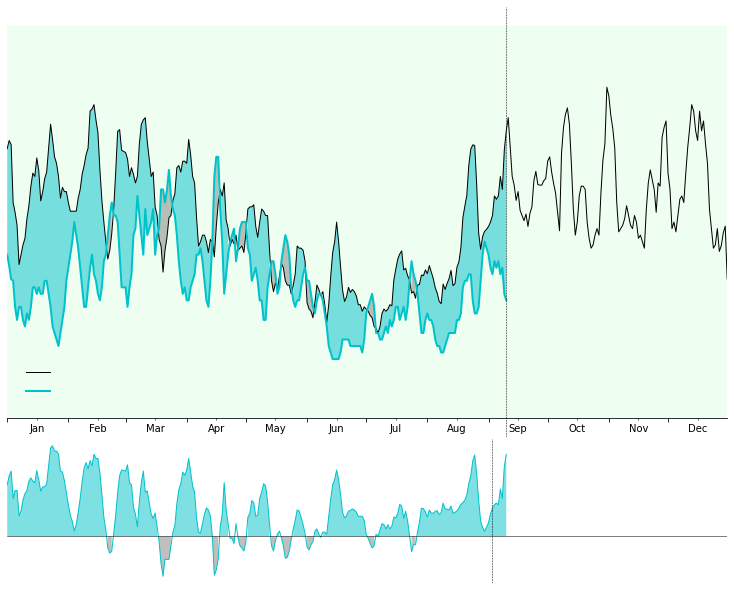

In [18]:
mfont = {'fontname':'Calibri'}

fig = plt.figure(constrained_layout=False)
spec = fig.add_gridspec(ncols=1, nrows=2, height_ratios=[3,1])
fig.set_size_inches([10,8],forward=True)

axs = [None] * 10
axs[0] = fig.add_subplot(spec[0])
axs[1] = fig.add_subplot(spec[1])

aqicn0 = np.zeros((len(dat),), dtype=int)            # Baseline
aqicn1 = np.zeros((len(dat),), dtype=int) + 50       # <50 Good Green
aqicn2 = np.zeros((len(dat),), dtype=int) + 100      # 50-<100 Moderate Yellow
aqicn3 = np.zeros((len(dat),), dtype=int) + 150      # 100-<150 Unhealthy for sensitive group Orange
aqicn4 = np.zeros((len(dat),), dtype=int) + 200      # 150-<200 Unhealthy Red
aqicn5 = np.zeros((len(dat),), dtype=int) + 300      # 200-<300 Very Unhealthy Purple
aqicn5 = np.zeros((len(dat),), dtype=int) + 500      # 300-<500 Hazardous Brown

## If want fill
axs[0].fill_between(date_index, aqicn0, aqicn1-38,facecolor='#BFFCC6', alpha=0.25)

#axs[0].fill_between(date_index, aqicn1, aqicn2,facecolor='#FFFFD1', alpha=0.25)
#axs[0].fill_between(date_index, aqicn2, aqicn3,facecolor='#FFCBC1', alpha=0.25)
#axs[0].fill_between(date_index, aqicn3, aqicn4,facecolor='#CCAAFF', alpha=0.25)
#axs[0].fill_between(date_index, aqicn4, aqicn5,facecolor='#DDA982', alpha=0.25)

# [0]
y1 = dat.avg3y_avg5d_so2
y2 = dat.avg5d_2020_so2

axs[0].plot(date_index, y1, color='black', linewidth=1, label="line1")
axs[0].plot(date_index, y2, color='#00c2cb', linewidth=2, label="line2")

axs[0].fill_between(date_index, y1, y2, 
                where=(y1 >= y2),facecolor='#00c2cb', alpha=0.5)
axs[0].fill_between(date_index, y1, y2, 
                where=(y1 <= y2),facecolor='grey', alpha=0.5)

#axs[0].set_title("PM2.5 Level", x=0.99,y=0.05, fontsize=14, loc="right", **mfont)
axs[0].yaxis.set_visible(False)
#axs[0].xaxis.set_visible(False) 
axs[0].spines["right"].set_visible(False)
axs[0].spines["top"].set_visible(False)
axs[0].spines["left"].set_visible(False)
axs[0].spines["bottom"].set_position(('data',0))
#axs[0].spines["bottom"].set_visible(False)
axs[0].axvline(x=datetime.date(2020,9,10), ymin=0, ymax=1, color="black", linewidth=0.5, linestyle="--")

axs[0].set_xlim([datetime.date(2020, 1, 1), datetime.date(2020, 12, 31)])
axs[0].xaxis.set_major_locator(dates.MonthLocator())
axs[0].xaxis.set_minor_locator(dates.MonthLocator(bymonthday=16))
axs[0].xaxis.set_major_formatter(ticker.NullFormatter())
axs[0].xaxis.set_minor_formatter(dates.DateFormatter('%b'))

#axs[0].legend(('2017-19 average', '2020'),frameon=False, loc=3, fontsize=12)
axs[0].legend(('', ''),frameon=False, loc=(0.02,0.08), fontsize=12)

#axs[0].text(0.9, 0.3, "Good", fontsize=12, transform=axs[0].transAxes)
#axs[0].text(s="Moderate", x=0.9, y=0.4)
#axs[0].text(s="Unhealthy for sensitive groups", x=0.9, y=0.9)


## If want line
#axs[0].plot(date_index, aqicn0+20, color="#006600", linewidth=2, linestyle="-")
#axs[0].plot(date_index, aqicn1, color="#cccc00", linewidth=2, linestyle="-")
#axs[0].plot(date_index, aqicn2, color="#ff9900", linewidth=2, linestyle="-")


# [1]
y1 = dat.so2_diff
y2 = np.zeros((len(y1),), dtype=int)

axs[1].plot(date_index, y1, color='#00c2cb', linewidth=1, label="line1")
axs[1].plot(date_index, y2, color='black', linewidth=0.5, label="line2")

axs[1].fill_between(date_index, y1, y2, 
                where=(y1 >= y2),facecolor='#00c2cb', alpha=0.5)
axs[1].fill_between(date_index, y1, y2, 
                where=(y1 <= y2),facecolor='grey', alpha=0.5)

#axs[1].set_title("Net Reduction", x=0.99,y=0.3, fontsize=14, loc="right", **mfont)

axs[1].yaxis.set_visible(False)
axs[1].xaxis.set_visible(False) 
axs[1].spines["right"].set_visible(False)
axs[1].spines["top"].set_visible(False)
axs[1].spines["left"].set_visible(False)
axs[1].spines["bottom"].set_visible(False)
axs[1].axvline(x=datetime.date(2020,9,3), ymin=0, ymax=1, color="black", linewidth=0.5, linestyle="--")
axs[1].set_xlim([datetime.date(2020, 1, 1), datetime.date(2020, 12, 31)])

fig.tight_layout(pad=0, w_pad=2, h_pad=0)
#fig.suptitle("Hong Kong pollution 'debt' of 2020, as to previous 3-year average", fontsize=18,y=1.05, **mfont)
fig.savefig("20200910-SO2.png",dpi=300, bbox_inches='tight')

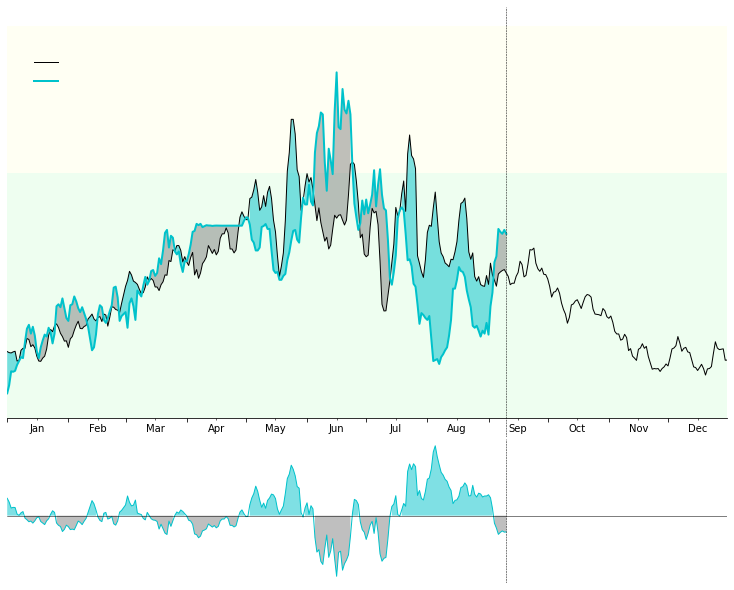

In [71]:
mfont = {'fontname':'Calibri'}

fig = plt.figure(constrained_layout=False)
spec = fig.add_gridspec(ncols=1, nrows=2, height_ratios=[3,1])
fig.set_size_inches([10,8],forward=True)

axs = [None] * 10
axs[0] = fig.add_subplot(spec[0])
axs[1] = fig.add_subplot(spec[1])

aqicn0 = np.zeros((len(dat),), dtype=int)            # Baseline
aqicn1 = np.zeros((len(dat),), dtype=int) + 50       # <50 Good Green
aqicn2 = np.zeros((len(dat),), dtype=int) + 100      # 50-<100 Moderate Yellow
aqicn3 = np.zeros((len(dat),), dtype=int) + 150      # 100-<150 Unhealthy for sensitive group Orange
aqicn4 = np.zeros((len(dat),), dtype=int) + 200      # 150-<200 Unhealthy Red
aqicn5 = np.zeros((len(dat),), dtype=int) + 300      # 200-<300 Very Unhealthy Purple
aqicn5 = np.zeros((len(dat),), dtype=int) + 500      # 300-<500 Hazardous Brown

## If want fill
axs[0].fill_between(date_index, aqicn0, aqicn1,facecolor='#BFFCC6', alpha=0.25)
axs[0].fill_between(date_index, aqicn1, aqicn2-20,facecolor='#FFFFD1', alpha=0.25)
#axs[0].fill_between(date_index, aqicn2, aqicn3-20,facecolor='#FFCBC1', alpha=0.25)
#axs[0].fill_between(date_index, aqicn3, aqicn4,facecolor='#CCAAFF', alpha=0.25)
#axs[0].fill_between(date_index, aqicn4, aqicn5,facecolor='#DDA982', alpha=0.25)

# [0]
y1 = dat.avg3y_avg5d_o3
y2 = dat.avg5d_2020_o3

axs[0].plot(date_index, y1, color='black', linewidth=1, label="line1")
axs[0].plot(date_index, y2, color='#00c2cb', linewidth=2, label="line2")

axs[0].fill_between(date_index, y1, y2, 
                where=(y1 >= y2),facecolor='#00c2cb', alpha=0.5)
axs[0].fill_between(date_index, y1, y2, 
                where=(y1 <= y2),facecolor='grey', alpha=0.5)

#axs[0].set_title("PM2.5 Level", x=0.99,y=0.05, fontsize=14, loc="right", **mfont)
axs[0].yaxis.set_visible(False)
#axs[0].xaxis.set_visible(False) 
axs[0].spines["right"].set_visible(False)
axs[0].spines["top"].set_visible(False)
axs[0].spines["left"].set_visible(False)
axs[0].spines["bottom"].set_position(('data',0))
#axs[0].spines["bottom"].set_visible(False)
axs[0].axvline(x=datetime.date(2020,9,10), ymin=0, ymax=1, color="black", linewidth=0.5, linestyle="--")

axs[0].set_xlim([datetime.date(2020, 1, 1), datetime.date(2020, 12, 31)])
axs[0].xaxis.set_major_locator(dates.MonthLocator())
axs[0].xaxis.set_minor_locator(dates.MonthLocator(bymonthday=16))
axs[0].xaxis.set_major_formatter(ticker.NullFormatter())
axs[0].xaxis.set_minor_formatter(dates.DateFormatter('%b'))

#axs[0].legend(('2017-19 average', '2020'),frameon=False, loc=3, fontsize=12)
axs[0].legend(('', ''),frameon=False, loc=(0.03,0.8), fontsize=12)

#axs[0].text(0.9, 0.3, "Good", fontsize=12, transform=axs[0].transAxes)
#axs[0].text(s="Moderate", x=0.9, y=0.4)
#axs[0].text(s="Unhealthy for sensitive groups", x=0.9, y=0.9)


## If want line
#axs[0].plot(date_index, aqicn0+20, color="#006600", linewidth=2, linestyle="-")
#axs[0].plot(date_index, aqicn1, color="#cccc00", linewidth=2, linestyle="-")
#axs[0].plot(date_index, aqicn2, color="#ff9900", linewidth=2, linestyle="-")


# [1]
y1 = dat.o3_diff
y2 = np.zeros((len(y1),), dtype=int)

axs[1].plot(date_index, y1, color='#00c2cb', linewidth=1, label="line1")
axs[1].plot(date_index, y2, color='black', linewidth=0.5, label="line2")

axs[1].fill_between(date_index, y1, y2, 
                where=(y1 >= y2),facecolor='#00c2cb', alpha=0.5)
axs[1].fill_between(date_index, y1, y2, 
                where=(y1 <= y2),facecolor='grey', alpha=0.5)

#axs[1].set_title("Net Reduction", x=0.99,y=0.3, fontsize=14, loc="right", **mfont)

axs[1].yaxis.set_visible(False)
axs[1].xaxis.set_visible(False) 
axs[1].spines["right"].set_visible(False)
axs[1].spines["top"].set_visible(False)
axs[1].spines["left"].set_visible(False)
axs[1].spines["bottom"].set_visible(False)
axs[1].axvline(x=datetime.date(2020,9,10), ymin=0, ymax=1, color="black", linewidth=0.5, linestyle="--")
axs[1].set_xlim([datetime.date(2020, 1, 1), datetime.date(2020, 12, 31)])

fig.tight_layout(pad=0, w_pad=2, h_pad=0)
#fig.suptitle("Hong Kong pollution 'debt' of 2020, as to previous 3-year average", fontsize=18,y=1.05, **mfont)
fig.savefig("20200910-O3.png",dpi=300, bbox_inches='tight')

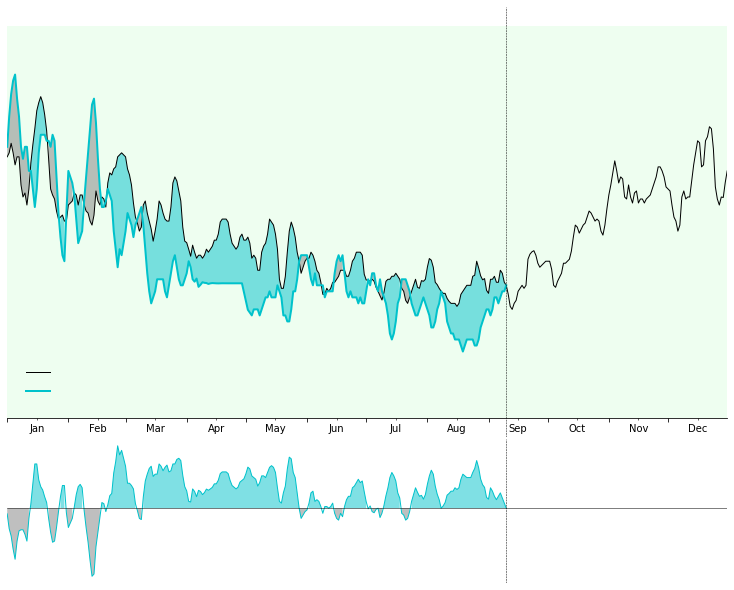

In [72]:
mfont = {'fontname':'Calibri'}

fig = plt.figure(constrained_layout=False)
spec = fig.add_gridspec(ncols=1, nrows=2, height_ratios=[3,1])
fig.set_size_inches([10,8],forward=True)

axs = [None] * 10
axs[0] = fig.add_subplot(spec[0])
axs[1] = fig.add_subplot(spec[1])

aqicn0 = np.zeros((len(dat),), dtype=int)            # Baseline
aqicn1 = np.zeros((len(dat),), dtype=int) + 50       # <50 Good Green
aqicn2 = np.zeros((len(dat),), dtype=int) + 100      # 50-<100 Moderate Yellow
aqicn3 = np.zeros((len(dat),), dtype=int) + 150      # 100-<150 Unhealthy for sensitive group Orange
aqicn4 = np.zeros((len(dat),), dtype=int) + 200      # 150-<200 Unhealthy Red
aqicn5 = np.zeros((len(dat),), dtype=int) + 300      # 200-<300 Very Unhealthy Purple
aqicn5 = np.zeros((len(dat),), dtype=int) + 500      # 300-<500 Hazardous Brown

## If want fill
axs[0].fill_between(date_index, aqicn0, aqicn1-37,facecolor='#BFFCC6', alpha=0.25)
#axs[0].fill_between(date_index, aqicn1, aqicn2,facecolor='#FFFFD1', alpha=0.25)
#axs[0].fill_between(date_index, aqicn2, aqicn3,facecolor='#FFCBC1', alpha=0.25)
#axs[0].fill_between(date_index, aqicn3, aqicn4,facecolor='#CCAAFF', alpha=0.25)
#axs[0].fill_between(date_index, aqicn4, aqicn5,facecolor='#DDA982', alpha=0.25)


# [0]
y1 = dat.avg3y_avg5d_co
y2 = dat.avg5d_2020_co

axs[0].plot(date_index, y1, color='black', linewidth=1, label="line1")
axs[0].plot(date_index, y2, color='#00c2cb', linewidth=2, label="line2")

axs[0].fill_between(date_index, y1, y2, 
                where=(y1 >= y2),facecolor='#00c2cb', alpha=0.5)
axs[0].fill_between(date_index, y1, y2, 
                where=(y1 <= y2),facecolor='grey', alpha=0.5)

#axs[0].set_title("PM2.5 Level", x=0.99,y=0.05, fontsize=14, loc="right", **mfont)
axs[0].yaxis.set_visible(False)
#axs[0].xaxis.set_visible(False) 
axs[0].spines["right"].set_visible(False)
axs[0].spines["top"].set_visible(False)
axs[0].spines["left"].set_visible(False)
axs[0].spines["bottom"].set_position(('data',0))
#axs[0].spines["bottom"].set_visible(False)
axs[0].axvline(x=datetime.date(2020,9,10), ymin=0, ymax=1, color="black", linewidth=0.5, linestyle="--")

axs[0].set_xlim([datetime.date(2020, 1, 1), datetime.date(2020, 12, 31)])
axs[0].xaxis.set_major_locator(dates.MonthLocator())
axs[0].xaxis.set_minor_locator(dates.MonthLocator(bymonthday=16))
axs[0].xaxis.set_major_formatter(ticker.NullFormatter())
axs[0].xaxis.set_minor_formatter(dates.DateFormatter('%b'))

#axs[0].legend(('2017-19 average', '2020'),frameon=False, loc=3, fontsize=12)
axs[0].legend(('', ''),frameon=False, loc=(0.02,0.08), fontsize=12)

#axs[0].text(0.9, 0.3, "Good", fontsize=12, transform=axs[0].transAxes)
#axs[0].text(s="Moderate", x=0.9, y=0.4)
#axs[0].text(s="Unhealthy for sensitive groups", x=0.9, y=0.9)


## If want line
#axs[0].plot(date_index, aqicn0+20, color="#006600", linewidth=2, linestyle="-")
#axs[0].plot(date_index, aqicn1, color="#cccc00", linewidth=2, linestyle="-")
#axs[0].plot(date_index, aqicn2, color="#ff9900", linewidth=2, linestyle="-")


# [1]
y1 = dat.co_diff
y2 = np.zeros((len(y1),), dtype=int)

axs[1].plot(date_index, y1, color='#00c2cb', linewidth=1, label="line1")
axs[1].plot(date_index, y2, color='black', linewidth=0.5, label="line2")

axs[1].fill_between(date_index, y1, y2, 
                where=(y1 >= y2),facecolor='#00c2cb', alpha=0.5)
axs[1].fill_between(date_index, y1, y2, 
                where=(y1 <= y2),facecolor='grey', alpha=0.5)

#axs[1].set_title("Net Reduction", x=0.99,y=0.3, fontsize=14, loc="right", **mfont)

axs[1].yaxis.set_visible(False)
axs[1].xaxis.set_visible(False) 
axs[1].spines["right"].set_visible(False)
axs[1].spines["top"].set_visible(False)
axs[1].spines["left"].set_visible(False)
axs[1].spines["bottom"].set_visible(False)
axs[1].axvline(x=datetime.date(2020,9,10), ymin=0, ymax=1, color="black", linewidth=0.5, linestyle="--")
axs[1].set_xlim([datetime.date(2020, 1, 1), datetime.date(2020, 12, 31)])

fig.tight_layout(pad=0, w_pad=2, h_pad=0)
#fig.suptitle("Hong Kong pollution 'debt' of 2020, as to previous 3-year average", fontsize=18,y=1.05, **mfont)
fig.savefig("20200910-CO.png",dpi=300, bbox_inches='tight')

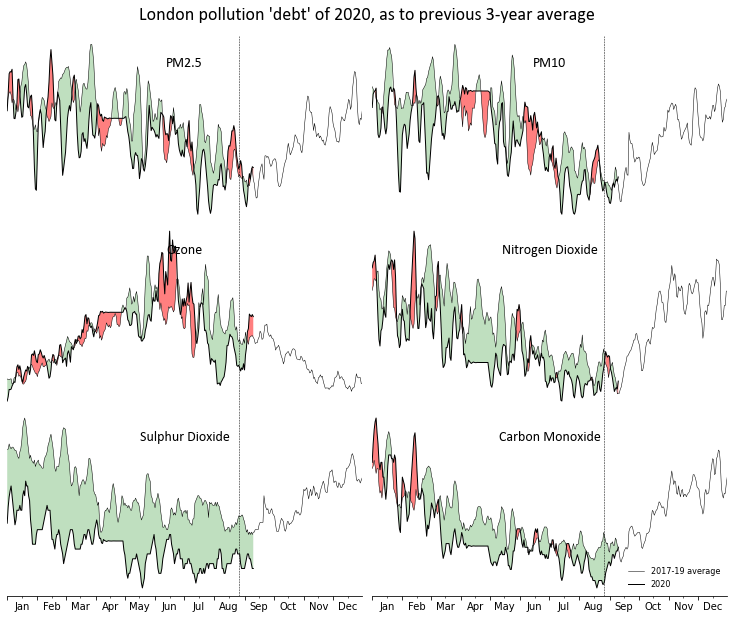

In [61]:
mfont = {'fontname':'Calibri'}

fig, axs = plt.subplots(3, 2, sharex=True, constrained_layout=False)
fig.set_size_inches([10,8],forward=True)

# [0,0]
y1 = dat.avg3y_avg5d_pm25
y2 = dat.avg5d_2020_pm25

axs[0, 0].plot(date_index, y1, color='black', linewidth=0.5, label="line1")
axs[0, 0].plot(date_index, y2, color='black', linewidth=1, label="line2")

axs[0, 0].fill_between(date_index, y1, y2, 
                where=(y1 >= y2),facecolor='green', alpha=0.25)
axs[0, 0].fill_between(date_index, y1, y2, 
                where=(y1 <= y2),facecolor='red', alpha=0.5)

axs[0, 0].set_title("PM2.5", x=0.5,y=0.8,fontsize=14, **mfont)
axs[0, 0].yaxis.set_visible(False)
axs[0, 0].xaxis.set_visible(False) 
axs[0, 0].spines["right"].set_visible(False)
axs[0, 0].spines["top"].set_visible(False)
axs[0, 0].spines["left"].set_visible(False)
axs[0, 0].spines["bottom"].set_visible(False)
axs[0, 0].axvline(x=datetime.date(2020,8,26), ymin=0, ymax=1, color="black", linewidth=0.5, linestyle="--")


# [0,1]
y1 = dat.avg3y_avg5d_pm10
y2 = dat.avg5d_2020_pm10

axs[0, 1].plot(date_index, y1, color='black', linewidth=0.5, label="line1")
axs[0, 1].plot(date_index, y2, color='black', linewidth=1, label="line2")

axs[0, 1].fill_between(date_index, y1, y2, 
                where=(y1 >= y2),facecolor='green', alpha=0.25)
axs[0, 1].fill_between(date_index, y1, y2, 
                where=(y1 <= y2),facecolor='red', alpha=0.5)

axs[0, 1].set_title("PM10", x=0.5,y=0.8,fontsize=14, **mfont)

axs[0, 1].yaxis.set_visible(False)
axs[0, 1].xaxis.set_visible(False) 
axs[0, 1].spines["right"].set_visible(False)
axs[0, 1].spines["top"].set_visible(False)
axs[0, 1].spines["left"].set_visible(False)
axs[0, 1].spines["bottom"].set_visible(False)
axs[0, 1].axvline(x=datetime.date(2020,8,26), ymin=0, ymax=1, color="black", linewidth=0.5, linestyle="--")


# [1,0]
y1 = dat.avg3y_avg5d_o3
y2 = dat.avg5d_2020_o3

axs[1, 0].plot(date_index, y1, color='black', linewidth=0.5, label="line1")
axs[1, 0].plot(date_index, y2, color='black', linewidth=1, label="line2")

axs[1, 0].fill_between(date_index, y1, y2, 
                where=(y1 >= y2),facecolor='green', alpha=0.25)
axs[1, 0].fill_between(date_index, y1, y2, 
                where=(y1 <= y2),facecolor='red', alpha=0.5)

axs[1, 0].set_title("Ozone", x=0.5,y=0.8,fontsize=14, **mfont)

axs[1, 0].yaxis.set_visible(False)
axs[1, 0].xaxis.set_visible(False) 
axs[1, 0].spines["right"].set_visible(False)
axs[1, 0].spines["top"].set_visible(False)
axs[1, 0].spines["left"].set_visible(False)
axs[1, 0].spines["bottom"].set_visible(False)
axs[1, 0].axvline(x=datetime.date(2020,8,26), ymin=0, ymax=1, color="black", linewidth=0.5, linestyle="--")


# [1,1]
y1 = dat.avg3y_avg5d_no2
y2 = dat.avg5d_2020_no2

axs[1, 1].plot(date_index, y1, color='black', linewidth=0.5, label="line1")
axs[1, 1].plot(date_index, y2, color='black', linewidth=1, label="line2")

axs[1, 1].fill_between(date_index, y1, y2, 
                where=(y1 >= y2),facecolor='green', alpha=0.25)
axs[1, 1].fill_between(date_index, y1, y2, 
                where=(y1 <= y2),facecolor='red', alpha=0.5)

axs[1, 1].set_title("Nitrogen Dioxide", x=0.5,y=0.8,fontsize=14, **mfont)

axs[1, 1].yaxis.set_visible(False)
axs[1, 1].xaxis.set_visible(False) 
axs[1, 1].spines["right"].set_visible(False)
axs[1, 1].spines["top"].set_visible(False)
axs[1, 1].spines["left"].set_visible(False)
axs[1, 1].spines["bottom"].set_visible(False)
axs[1, 1].axvline(x=datetime.date(2020,8,26), ymin=0, ymax=1, color="black", linewidth=0.5, linestyle="--")


# [2,0]
y1 = dat.avg3y_avg5d_so2
y2 = dat.avg5d_2020_so2

axs[2, 0].plot(date_index, y1, color='black', linewidth=0.5, label="line1")
axs[2, 0].plot(date_index, y2, color='black', linewidth=1, label="line2")

axs[2, 0].fill_between(date_index, y1, y2, 
                where=(y1 >= y2),facecolor='green', alpha=0.25)
axs[2, 0].fill_between(date_index, y1, y2, 
                where=(y1 <= y2),facecolor='red', alpha=0.5)

axs[2, 0].set_title("Sulphur Dioxide", x=0.5,y=0.8,fontsize=14, **mfont)

axs[2, 0].set_xlim([datetime.date(2020, 1, 1), datetime.date(2020, 12, 31)])
axs[2, 0].xaxis.set_major_locator(dates.MonthLocator())
axs[2, 0].xaxis.set_minor_locator(dates.MonthLocator(bymonthday=16))
axs[2, 0].xaxis.set_major_formatter(ticker.NullFormatter())
axs[2, 0].xaxis.set_minor_formatter(dates.DateFormatter('%b'))

axs[2, 0].yaxis.set_visible(False)
#axs[2, 0].xaxis.set_visible(False) 
axs[2, 0].spines["right"].set_visible(False)
axs[2, 0].spines["top"].set_visible(False)
axs[2, 0].spines["left"].set_visible(False)
#axs[2, 0].spines["bottom"].set_visible(False)
axs[2, 0].axvline(x=datetime.date(2020,8,26), ymin=0, ymax=1, color="black", linewidth=0.5, linestyle="--")


# [2,1]
y1 = dat.avg3y_avg5d_co
y2 = dat.avg5d_2020_co

axs[2, 1].plot(date_index, y1, color='black', linewidth=0.5, label="line1")
axs[2, 1].plot(date_index, y2, color='black', linewidth=1, label="line2")

axs[2, 1].fill_between(date_index, y1, y2, 
                where=(y1 >= y2),facecolor='green', alpha=0.25)
axs[2, 1].fill_between(date_index, y1, y2, 
                where=(y1 <= y2),facecolor='red', alpha=0.5)

axs[2, 1].set_title("Carbon Monoxide", x=0.5,y=0.8,fontsize=14, **mfont)

axs[2, 1].set_xlim([datetime.date(2020, 1, 1), datetime.date(2020, 12, 31)])
axs[2, 1].xaxis.set_major_locator(dates.MonthLocator())
axs[2, 1].xaxis.set_minor_locator(dates.MonthLocator(bymonthday=16))
axs[2, 1].xaxis.set_major_formatter(ticker.NullFormatter())
axs[2, 1].xaxis.set_minor_formatter(dates.DateFormatter('%b'))

axs[2, 1].yaxis.set_visible(False)
#axs[2, 1].xaxis.set_visible(False) 
axs[2, 1].spines["right"].set_visible(False)
axs[2, 1].spines["top"].set_visible(False)
axs[2, 1].spines["left"].set_visible(False)
#axs[2, 1].spines["bottom"].set_visible(False)
axs[2, 1].axvline(x=datetime.date(2020,8,26), ymin=0, ymax=1, color="black", linewidth=0.5, linestyle="--")

axs[2, 1].legend(('2017-19 average', '2020'),frameon=False, loc=4, fontsize=8)


fig.tight_layout(pad=0, w_pad=1, h_pad=0)
fig.suptitle("London pollution 'debt' of 2020, as to previous 3-year average", fontsize=18,y=1.05, **mfont)
fig.savefig("High resolution.png",dpi=300, bbox_inches='tight')